Import library

## NON SKLEARN

In [144]:
import numpy as np
import pandas as pd
import time

In [145]:
# Đặt cấu hình hiển thị
np.set_printoptions(suppress=True, formatter={'float_kind': '{:.2f}'.format})


Read dataset

In [146]:
df = pd.read_csv('1b.csv')
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Target
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280,750,-


Data Normalization

In [147]:
df_numeric = df.copy()

df_numeric[['A2', 'A3', 'A8', 'A11', 'A14', 'A15' ]] = (
        df_numeric[['A2', 'A3', 'A8', 'A11', 'A14', 'A15' ]]
        .apply(pd.to_numeric, errors='coerce'))

df_numeric = df_numeric.replace('?', np.nan).dropna()

### chuẩn hóa minmax

In [148]:
df_clean = df_numeric.copy()

In [149]:
# Calculate variance of each column
variance_array_before = (
                df_clean.select_dtypes(include=[np.number])
                .var(ddof=1)
                .values
    )

variance_array_before

array([140.14, 25.27, 11.36, 24.69, 28323.82, 27596935.04])

In [150]:
# normalize min-max
time_start_minmax = time.time()

for i in df_clean.select_dtypes(include=[np.number]).columns:
    df_clean[i] = (
            (df_clean[i] - df_clean[i].min()) * 100 / 
            (df_clean[i].max() - df_clean[i].min())
        )
time_end_minmax = time.time()

In [151]:
df_clean.select_dtypes(include=[np.number])

,A2,A3,A8,A11,A14,A15
0,27.111111,0.000000,4.385965,1.492537,10.10,0.000
1,71.301587,15.928571,10.666667,8.955224,2.15,0.560
2,17.063492,1.785714,5.263158,0.000000,14.00,0.824
3,22.349206,5.500000,13.157895,7.462687,5.00,0.003
4,10.190476,20.089286,6.000000,0.000000,6.00,0.000
...,...,...,...,...,...,...
685,11.634921,36.017857,4.385965,0.000000,13.00,0.000
686,14.158730,2.678571,7.017544,2.985075,10.00,0.394
687,18.253968,48.214286,7.017544,1.492537,10.00,0.001
688,6.619048,0.732143,0.140351,0.000000,14.00,0.750


In [152]:
# Calculate variance of each column
variance_array_after = (
            df_clean.select_dtypes(include=[np.number])
            .var(ddof=0)
            .values
    )
variance_array_after

array([352.56, 321.85, 139.70, 54.91, 70.70, 27.55])

### chuẩn hóa z-score

In [153]:
df_zscore = df_numeric.copy()

In [154]:
# Tính trung bình và độ lệch chuẩn cho từng cột
time_start_zscore = time.time()
df_clean_zscore = (
    (df_zscore.select_dtypes(include=[np.number])
            -  df_zscore.select_dtypes(include=[np.number]).mean()) 
    /  df_zscore.select_dtypes(include=[np.number]).std()
)
time_end_zscore = time.time()

In [155]:
df_clean_zscore

,A2,A3,A8,A11,A14,A15
0,-0.056918,-0.960704,-0.294945,-0.302365,0.128583,-0.192977
1,2.294777,-0.073509,0.236036,0.703976,-0.816176,-0.086377
2,-0.591625,-0.861243,-0.220786,-0.503633,0.592050,-0.036122
3,-0.310334,-0.654363,0.446648,0.502708,-0.477489,-0.192406
4,-0.957388,0.158236,-0.158492,-0.503633,-0.358651,-0.192977
...,...,...,...,...,...,...
685,-0.880518,1.045432,-0.294945,-0.503633,0.473212,-0.192977
686,-0.746208,-0.811512,-0.072467,-0.101096,0.116699,-0.117976
687,-0.528271,1.724753,-0.072467,-0.302365,0.116699,-0.192786
688,-1.147449,-0.919925,-0.653876,-0.503633,0.592050,-0.050209


## SKLEARN

In [156]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import numpy as np
import pandas as pd

In [157]:
df_sklearn = pd.read_csv('1b.csv')
df_sklearn

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Target
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280,750,-


In [158]:
df_sklearn = df_sklearn.replace('?', np.nan).dropna()

In [159]:
df_numeric_sklearn = df_sklearn.copy()

df_numeric_sklearn[['A2', 'A3', 'A8', 'A11', 'A14', 'A15' ]] = (
                        df_numeric_sklearn[['A2', 'A3', 'A8', 'A11', 'A14', 'A15' ]]
                        .apply(pd.to_numeric, errors='coerce')
    )
df_numeric_sklearn

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Target
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280,750,-


### chuẩn hóa min max dùng sklearn

In [160]:
scaler = MinMaxScaler(feature_range=(0, 100))

In [161]:
# minmax
time_start_minmax_library = time.time()
df_clean_sklearn =(
    pd.DataFrame(
        scaler.fit_transform(df_numeric_sklearn.select_dtypes(include=[np.number]))
        ,columns=['A2', 'A3', 'A8', 'A11', 'A14', 'A15']
        )
    )
time_end_minmax_library = time.time()

In [162]:
df_clean_sklearn

,A2,A3,A8,A11,A14,A15
0,27.111111,0.000000,4.385965,1.492537,10.10,0.000
1,71.301587,15.928571,10.666667,8.955224,2.15,0.560
2,17.063492,1.785714,5.263158,0.000000,14.00,0.824
3,22.349206,5.500000,13.157895,7.462687,5.00,0.003
4,10.190476,20.089286,6.000000,0.000000,6.00,0.000
...,...,...,...,...,...,...
648,11.634921,36.017857,4.385965,0.000000,13.00,0.000
649,14.158730,2.678571,7.017544,2.985075,10.00,0.394
650,18.253968,48.214286,7.017544,1.492537,10.00,0.001
651,6.619048,0.732143,0.140351,0.000000,14.00,0.750


In [163]:
# Calculate variance of each column
variance_array_library = df_clean_sklearn.select_dtypes(include=[np.number]).var(ddof=0).values
variance_array_library

array([352.56, 321.85, 139.70, 54.91, 70.70, 27.55])

### chuẩn hóa z-score dùng sklearn

In [164]:
scaler_zscore = StandardScaler()

In [165]:
#zscore
time_start_zscore_library = time.time()
df_clean_zscore_sklearn = (
    pd.DataFrame(
        scaler_zscore.fit_transform(df_numeric_sklearn.select_dtypes(include=[np.number]))
        ,columns=['A2', 'A3', 'A8', 'A11', 'A14', 'A15']
        )
    )
time_end_zscore_library = time.time()

In [166]:
print(f"giá trị trung bình của dữ liệu ban đầu:",scaler_zscore.mean_)
print(f"giá trị trung bình của dữ liệu sau chuẩn hóa:",df_clean_zscore.mean().values)
print(f"giá trị trung bình của dữ liệu sau chuẩn hóa bằng thư viện:",df_clean_zscore_sklearn.mean().values)
print(f"Chênh lệch giá trị giữa dữ liệu sau chuẩn hóa và dữ liệu sau chuẩn hóa bằng thư viện:\n",df_clean_zscore.mean() - df_clean_zscore_sklearn.mean())
print("\n")
print(f"độ lệch chuẩn của dữ liệu ban đầu:",scaler_zscore.scale_)
print(f"độ lệch chuẩn của dữ liệu sau chuẩn hóa:",df_clean_zscore.std().values)
print(f"độ lệch chuẩn của dữ liệu sau chuẩn hóa bằng thư viện:",df_clean_zscore_sklearn.std().values)
print(f"Chênh lệch giá trị giữa dữ liệu sau chuẩn hóa và dữ liệu sau chuẩn hóa bằng thư viện:\n",df_clean_zscore.mean() - df_clean_zscore_sklearn.mean())


giá trị trung bình của dữ liệu ban đầu: [31.50 4.83 2.24 2.50 180.36 1013.76]
giá trị trung bình của dữ liệu sau chuẩn hóa: [-0.00 -0.00 0.00 0.00 0.00 0.00]
giá trị trung bình của dữ liệu sau chuẩn hóa bằng thư viện: [-0.00 -0.00 0.00 0.00 0.00 -0.00]
Chênh lệch giá trị giữa dữ liệu sau chuẩn hóa và dữ liệu sau chuẩn hóa bằng thư viện:
 A2    -5.440603e-18
A3    -1.088121e-17
A8     4.352482e-17
A11    4.352482e-17
A14   -2.720301e-17
A15    1.088121e-17
dtype: float64


độ lệch chuẩn của dữ liệu ban đầu: [11.83 5.02 3.37 4.96 168.17 5249.25]
độ lệch chuẩn của dữ liệu sau chuẩn hóa: [1.00 1.00 1.00 1.00 1.00 1.00]
độ lệch chuẩn của dữ liệu sau chuẩn hóa bằng thư viện: [1.00 1.00 1.00 1.00 1.00 1.00]
Chênh lệch giá trị giữa dữ liệu sau chuẩn hóa và dữ liệu sau chuẩn hóa bằng thư viện:
 A2    -5.440603e-18
A3    -1.088121e-17
A8     4.352482e-17
A11    4.352482e-17
A14   -2.720301e-17
A15    1.088121e-17
dtype: float64


In [167]:
difference = np.abs(df_clean_zscore - df_clean_zscore_sklearn).sum().sum()
print(difference)

2525.1761176583527


In [168]:
df_clean_zscore_sklearn

,A2,A3,A8,A11,A14,A15
0,-0.056962,-0.961440,-0.295171,-0.302596,0.128682,-0.193125
1,2.296536,-0.073565,0.236217,0.704516,-0.816802,-0.086443
2,-0.592078,-0.861903,-0.220955,-0.504019,0.592504,-0.036150
3,-0.310572,-0.654865,0.446990,0.503093,-0.477855,-0.192553
4,-0.958122,0.158358,-0.158613,-0.504019,-0.358926,-0.193125
...,...,...,...,...,...,...
648,-0.881193,1.046233,-0.295171,-0.504019,0.473575,-0.193125
649,-0.746780,-0.812134,-0.072523,-0.101174,0.116789,-0.118066
650,-0.528676,1.726075,-0.072523,-0.302596,0.116789,-0.192934
651,-1.148329,-0.920630,-0.654378,-0.504019,0.592504,-0.050247


### Tổng kết

In [169]:
time_exe_minmax = time_end_minmax - time_start_minmax
time_library_exe_minmax = time_end_minmax_library - time_start_minmax_library
print("--Chuẩn hóa min max--")
print(f"Thời gian thuật toán tự triển khai \t",time_exe_minmax)
print(f"Thời gian thuật toán của sklearn\t",time_library_exe_minmax)

time_exe_zscore = time_end_zscore - time_start_zscore
time_library_exe_zscore = time_end_zscore_library - time_start_zscore_library
print("--Chuẩn hóa z score--")
print(f"Thời gian thuật toán tự triển khai\t",time_exe_zscore)
print(f"Thời gian thuật toán của sklearn\t",time_library_exe_zscore)

print(f"Phương sai trước khi chuẩn hóa min max:\n",variance_array_before)
print(f"Phương sai sau khi chuẩn hóa MinMax:\n",variance_array_after)  
print(f"Phương sai sau khi chuẩn hóa MinMax bằng sklearn:\n",variance_array_library)   

--Chuẩn hóa min max--
Thời gian thuật toán tự triển khai 	 0.010002613067626953
Thời gian thuật toán của sklearn	 0.004000663757324219
--Chuẩn hóa z score--
Thời gian thuật toán tự triển khai	 0.004001140594482422
Thời gian thuật toán của sklearn	 0.007001161575317383
Phương sai trước khi chuẩn hóa min max:
 [140.14 25.27 11.36 24.69 28323.82 27596935.04]
Phương sai sau khi chuẩn hóa MinMax:
 [352.56 321.85 139.70 54.91 70.70 27.55]
Phương sai sau khi chuẩn hóa MinMax bằng sklearn:
 [352.56 321.85 139.70 54.91 70.70 27.55]


### Đồ thị

In [170]:
import matplotlib.pyplot as plt

#### thời gian min max

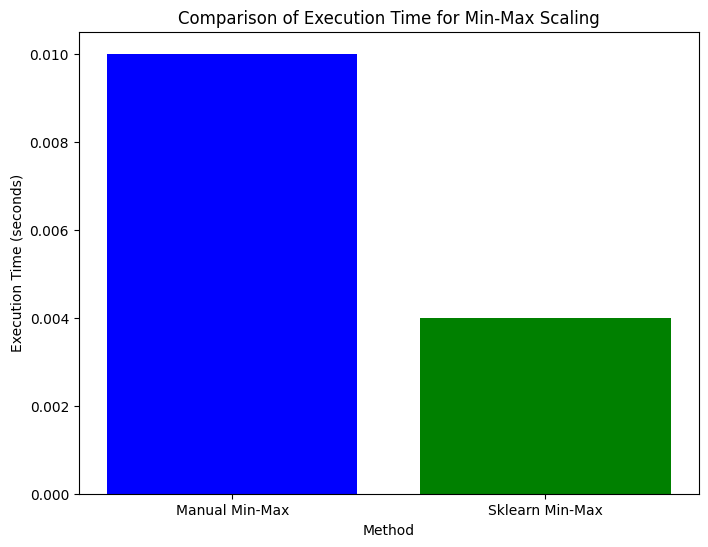

In [171]:
# Vẽ biểu đồ so sánh thời gian của min max
plt.figure(figsize=(8, 6))
plt.bar(['Manual Min-Max', 'Sklearn Min-Max'], [time_exe_minmax, time_library_exe_minmax], color=['blue', 'green'])
plt.xlabel('Method')
plt.ylabel('Execution Time (seconds)')
plt.title('Comparison of Execution Time for Min-Max Scaling')
plt.show()

#### thời gian z-score

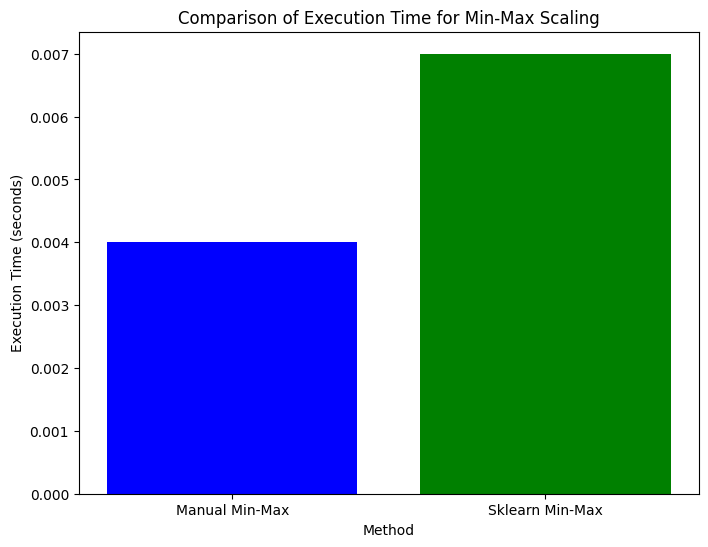

In [172]:
# Vẽ biểu đồ so sánh thời gian của zscore
plt.figure(figsize=(8, 6))
plt.bar(['Manual Min-Max', 'Sklearn Min-Max'], [time_exe_zscore, time_library_exe_zscore], color=['blue', 'green'])
plt.xlabel('Method')
plt.ylabel('Execution Time (seconds)')
plt.title('Comparison of Execution Time for Min-Max Scaling')
plt.show()

#### chênh lệch giá trị z-score giữa 2 thuật toán

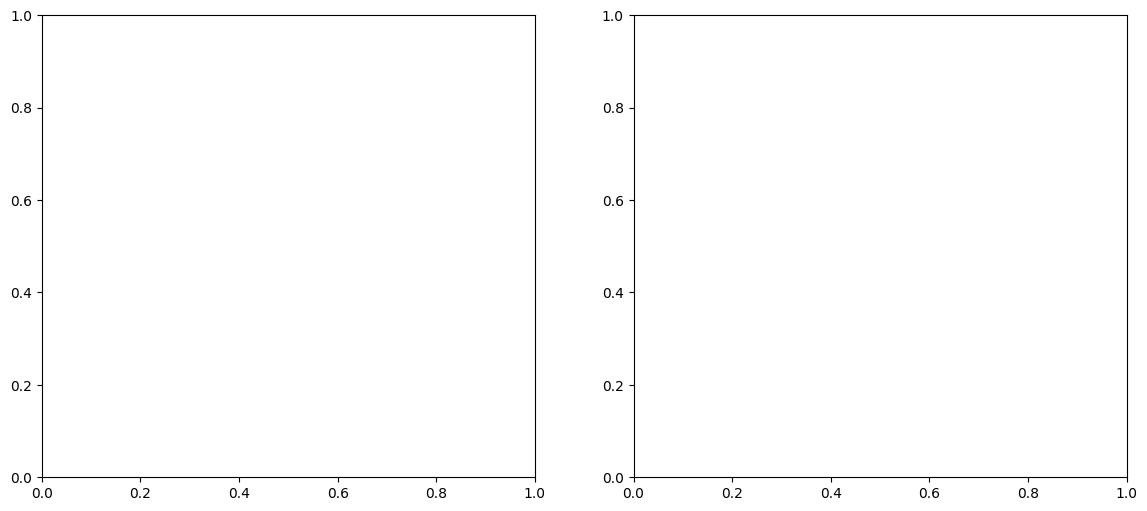

In [173]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
manual_means = df_clean_zscore.mean()
manual_stds = df_clean_zscore.std()
sklearn_means = scaler_zscore.mean_
sklearn_stds = scaler_zscore.scale_

In [ ]:
# Biểu đồ so sánh mean
ax1.bar(np.arange(len(manual_means)) - 0.2, manual_means, width=0.4, label='Mean (Manual)', color='blue')
ax1.bar(np.arange(len(sklearn_means)) + 0.2, sklearn_means, width=0.4, label='Mean (Sklearn)', color='orange')
ax1.set_xticks(np.arange(len(manual_means)))
ax1.set_xticklabels(df_clean_zscore.select_dtypes(include=[np.number]).columns, rotation=45)
ax1.set_title("Comparison of Means")
ax1.legend()

ValueError: The number of FixedLocator locations (6), usually from a call to set_ticks, does not match the number of labels (4).

In [ ]:

# Biểu đồ so sánh std
ax2.bar(np.arange(len(manual_stds)) - 0.2, manual_stds, width=0.4, label='Std (Manual)', color='green')
ax2.bar(np.arange(len(sklearn_stds)) + 0.2, sklearn_stds, width=0.4, label='Std (Sklearn)', color='red')
ax2.set_xticks(np.arange(len(manual_stds)))
ax2.set_xticklabels(df.select_dtypes(include=[np.number]).columns, rotation=45)
ax2.set_title("Comparison of Standard Deviations")
ax2.legend()

plt.show()